In [2]:
# !pip install opencv-python 
# !pip install matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt
from omr import convolve_separable,convolve
import math
from PIL import Image

In [3]:
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code= cv2.COLOR_BGR2GRAY)
    return image

In [4]:
def detect_stave_distance(im):
    '''
    Given grayscale PIL.Image of sheet music, use Hough transform to find
    distance between staves.
    Use 2D voting space (D1 = row of first line, D2 = spacing distance)

    Params:
        im (PIL.Image): grayscale image of sheet music

    Returns:
        staveDist (float): distance between staves
    '''
    pass

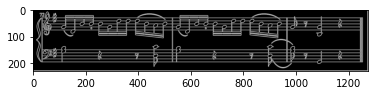

In [5]:
image = processImage('images/music1.png')
sobkx1 = np.transpose(np.array([[1,2,1]]))
sobkx2 = np.array([[-1,0,1]])
sobky1 = np.transpose(np.array([[-1,0,1]]))
sobky2 = np.array([[1,2,1]])


edges = convolve_separable(image, sobky1,sobky2)
e2 = convolve_separable(image, sobkx1, sobkx2)
# print(e2.sum()== edges.sum())

def sobel_gradient(image):
    sobkx1 = np.transpose(np.array([[1,2,1]]))
    sobkx2 = np.array([[-1,0,1]])
    sobky1 = np.transpose(np.array([[-1,0,1]]))
    sobky2 = np.array([[1,2,1]])
    a = convolve_separable(image, sobky1,sobky2)
    b = convolve_separable(image, sobkx1, sobkx2)

    c = np.sqrt(np.square(a) + np.square(b))
    c *= 255.0 / c.max()
    return c


# Sobel Gradient magnitude
# c = np.sqrt(np.square(edges) + np.square(e2))
# edges = Image.fromarray(c)
c = sobel_gradient(image)
templ = processImage('./templates/template1.png')
# templ = sobel_gradient(templ)
d = convolve(c, templ)
c = Image.fromarray(c)
# c.show()
plt.gray()
plt.imshow(c)


(231, 1274) (11, 17)


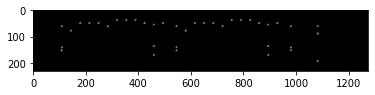

In [13]:
# d = Image.fromarray(d)
# plt.imshow(d)
# plt.imshow(templ)
templ = processImage('./templates/template1.png')
# plt.imshow(templ)
# e = convolve(templ,templ)
# plt.imshow(e)
def hamming_distance(image, template):
    print(image.shape[::1], template.shape[::1])
    xlen,ylen = image.shape[::1]
    ulen, vlen = template.shape[::1]
    final_image = np.zeros_like(image)
    for i in range(0,xlen):
        for j in range(0,ylen):
            try:
                sm = 0
                for u in range(0,ulen):
                    for v in range(0,vlen):
                        try:
                            if image[i+u][j+v] == template[u][v]:                    
                                sm +=1
                            # if sm < (ulen*vlen/2) and  image[i+u][j+v] == template[u][v]:                    
                            #         sm +=1
                            # else:
                            #     break
                        except:
                            break
                # final_image[i][j] = sm
                # if that pixel's sum is more than half of the template's sum:
                if sm > (ulen*vlen/2):
                    final_image[i][j] = sm

            except:
                break
    return final_image
s = hamming_distance(image, templ)
plt.imshow(s)

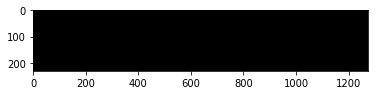

In [49]:
# Image.fromarray(s).show()
# ind = np.argpartition(s, -30)[-30:]
# ind
# a = s.reshape(1, np.size(s))
a = s.flatten()
ind = np.argpartition(a, -30)[-30:]
np.size(ind)
ind
# r = np.zeros_like(s.shape[0],s.shape[1])
r = np.zeros_like(a)
# r[i for i in ind] = a[i]
for i in ind:
    r[i] = 255
dd = r.reshape(s.shape[0],s.shape[1])
final_image = np.zeros_like(image)
for i in range(0,dd.shape[0]):
    for j in range(0,dd.shape[1]):
        if dd[i][j] == 255:
            final_image[i:i+50][j:j+50] = 500
            # print('ye')

# final_image =
# dd.sum()
plt.imshow(final_image)
# a.reshape(s.shape[0],s.shape[1])
# s.flatten()
# plt.imshow(image)
# np.round(180614 / s.shape[0])

In [15]:
Image.fromarray(image).show()

In [16]:
a = Image.open('./templates/template1.png')
a.show()# a.sum()a
a = processImage('./templates/template1.png')
a

array([[255, 255, 255, 224,  24,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 128],
       [255, 255, 227,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 114],
       [255, 249,  33,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 102],
       [255, 140,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 175],
       [251,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 227],
       [242,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 106, 254],
       [245,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  14, 242, 255],
       [241,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         10, 224, 255, 255],
       [253,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62,
        235, 255, 255, 255],
       [255, 236,  28,   0,   0,   0,   0,   0,   0,   0,   7, 175, 254,
        2

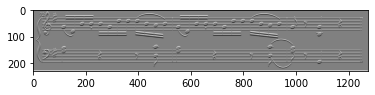

In [4]:


def houghlines(image, ntheta, nrho, k):
    '''
    given binary image I of size mxn, using theta, rho discrete steps for angle, radius. return list of parameter pairs (theta,rho) for k strongest lines found.
    '''
    uc,vc = (image.shape[0]/2,image.shape[1]/2)
    rmax = math.sqrt(uc^2 + vc^2)
    inctheta = math.pi/ntheta
    incrho = 2*rmax/nrho

    # create accumation array acc(itheta, irho); size ntheta x nrho
    accumulator = np.zeros((ntheta,nrho))
    # for all image coordinates:
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            if image[i][j] > 0:
                x = i - uc
                y = j - vc
                for iang in range(0, ntheta):
                    theta = inctheta * iang
                    
    return uc, vc, rmax, inctheta,incrho
# houghlines(edges, 180, 100, 10)
    # pass

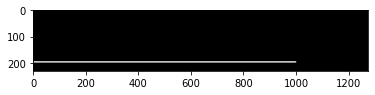

In [31]:
image = processImage('images/music1.png')
edges = cv2.Canny(image, 50, 150, apertureSize = 3)
# edges
# plt.imshow(edges)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
# cv2.HoughLines()
canvas = np.zeros((image.shape[0],image.shape[1]))
# plt.imshow(lines)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(canvas,(x1,y1),(x2,y2),255,3)
# lines
# plt.figure(figsize = (200,300))
plt.gray()
plt.imshow(canvas)
